In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mt

In [6]:
from sklearn.datasets import load_iris
from matplotlib import rc

rc('font', family='AppleGothic')

# plt.rcParams['axes.unicode_minus'] = False #마이너스 꺠짐 현상 해결 -> 나한테는 필요 없음

In [12]:
df_Seoul = pd.read_csv('서울시 체력단련장업 인허가 정보.csv', encoding='cp949')
print(df_Seoul)

      개방자치단체코드                  관리번호     인허가일자  인허가취소일자  영업상태코드  영업상태명  \
0      3030000  CDFH3301061993000002  19930701      NaN       3     폐업   
1      3030000  CDFH3301061994000001  19940127      NaN       3     폐업   
2      3180000  CDFH3301062004000008  20040729      NaN       3     폐업   
3      3060000  CDFH3301062022000006  20220516      NaN       1  영업/정상   
4      3160000  CDFH3301062020000001  20200131      NaN       1  영업/정상   
...        ...                   ...       ...      ...     ...    ...   
5472   3180000  CDFH3301062022000025  20221020      NaN       1  영업/정상   
5473   3230000  CDFH3301062019000010  20190625      NaN       1  영업/정상   
5474   3220000  CDFH3301062022000049  20221021      NaN       1  영업/정상   
5475   3200000  CDFH3301062022000025  20221027      NaN       1  영업/정상   
5476   3230000  CDFH3301062022000025  20221018      NaN       3     폐업   

      상세영업상태코드 상세영업상태명        폐업일자  휴업시작일자  ...        좌표정보(Y)  문화체육업종명  \
0            3      폐업  20040417.0  

In [5]:
# df_Seoul['인허가일자'] = pd.to_datetime(df_Seoul['인허가일자'], format='%Y%m%d') 
# df_Seoul['인허가취소일자'] = pd.to_datetime(df_Seoul['인허가취소일자'], format='%Y%m%d') 
# df_Seoul['폐업일자'] = pd.to_datetime(df_Seoul['폐업일자'], format='%Y%m%d') 
# df_Seoul['휴업시작일자'] = pd.to_datetime(df_Seoul['휴업시작일자'], format='%Y%m%d') 
# df_Seoul['휴업종료일자'] = pd.to_datetime(df_Seoul['휴업종료일자'], format='%Y%m%d') 

print(df_Seoul.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5451 entries, 0 to 5450
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방자치단체코드  5451 non-null   int64  
 1   관리번호      5451 non-null   object 
 2   인허가일자     5451 non-null   int64  
 3   인허가취소일자   4 non-null      float64
 4   영업상태코드    5451 non-null   int64  
 5   영업상태명     5451 non-null   object 
 6   상세영업상태코드  5451 non-null   int64  
 7   상세영업상태명   5451 non-null   object 
 8   폐업일자      2141 non-null   float64
 9   휴업시작일자    5 non-null      float64
 10  휴업종료일자    5 non-null      float64
 11  재개업일자     0 non-null      float64
 12  전화번호      3243 non-null   object 
 13  소재지면적     0 non-null      float64
 14  소재지우편번호   2595 non-null   float64
 15  지번주소      5379 non-null   object 
 16  도로명주소     5225 non-null   object 
 17  도로명우편번호   3801 non-null   float64
 18  사업장명      5451 non-null   object 
 19  최종수정일자    5451 non-null   float64
 20  데이터갱신구분   5451 non-null   obje

In [14]:
Seoul = df_Seoul[['사업장명', '인허가일자', '인허가취소일자', '폐업일자', '상세영업상태코드','상세영업상태명', '도로명주소', '지번주소']]
Seoul.to_csv("서울헬스장현황_가공.csv", mode = 'w', encoding = 'cp949')

In [15]:
df_GG = pd.read_csv('체력단련장업체현황.csv', encoding='cp949')
print(df_GG.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959 entries, 0 to 4958
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시군명        4959 non-null   object 
 1   사업장명       4959 non-null   object 
 2   인허가일자      4959 non-null   int64  
 3   인허가취소일자    4 non-null      float64
 4   영업상태구분코드   4959 non-null   int64  
 5   영업상태명      4959 non-null   object 
 6   폐업일자       1775 non-null   float64
 7   소재지시설전화번호  2899 non-null   object 
 8   소재지면적정보    0 non-null      float64
 9   도로명우편번호    3708 non-null   float64
 10  소재지도로명주소   4845 non-null   object 
 11  소재지지번주소    4959 non-null   object 
 12  소재지우편번호    4954 non-null   float64
 13  WGS84위도    4946 non-null   float64
 14  WGS84경도    4946 non-null   float64
 15  업태구분명정보    0 non-null      float64
 16  X좌표값       4685 non-null   float64
 17  Y좌표값       4685 non-null   float64
 18  문화체육업종명    4959 non-null   object 
 19  공사립구분명     4959 non-null   object 
 20  보험가입여부코드

In [16]:
# df_GG['인허가일자'] = pd.to_datetime(df_GG['인허가일자'], errors = 'coerce', format='%Y%m%d') 
# df_GG['인허가취소일자'] = pd.to_datetime(df_GG['인허가취소일자'], errors = 'coerce', format='%Y%m%d') 
# df_GG['폐업일자'] = pd.to_datetime(df_GG['폐업일자'], errors = 'coerce', format='%Y%m%d') 
df_GG.rename(columns={'영업상태구분코드':'상세영업상태코드'}, inplace = True) 
df_GG.rename(columns={'영업상태명':'상세영업상태명'}, inplace = True)
df_GG.rename(columns={'소재지도로명주소':'도로명주소'}, inplace = True)
df_GG.rename(columns={'소재지지번주소':'지번주소'}, inplace = True)
print(df_GG.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959 entries, 0 to 4958
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시군명        4959 non-null   object 
 1   사업장명       4959 non-null   object 
 2   인허가일자      4959 non-null   int64  
 3   인허가취소일자    4 non-null      float64
 4   상세영업상태코드   4959 non-null   int64  
 5   상세영업상태명    4959 non-null   object 
 6   폐업일자       1775 non-null   float64
 7   소재지시설전화번호  2899 non-null   object 
 8   소재지면적정보    0 non-null      float64
 9   도로명우편번호    3708 non-null   float64
 10  도로명주소      4845 non-null   object 
 11  지번주소       4959 non-null   object 
 12  소재지우편번호    4954 non-null   float64
 13  WGS84위도    4946 non-null   float64
 14  WGS84경도    4946 non-null   float64
 15  업태구분명정보    0 non-null      float64
 16  X좌표값       4685 non-null   float64
 17  Y좌표값       4685 non-null   float64
 18  문화체육업종명    4959 non-null   object 
 19  공사립구분명     4959 non-null   object 
 20  보험가입여부코드

In [17]:
Gyeonggi = df_GG[['사업장명', '인허가일자', '인허가취소일자', '폐업일자', '상세영업상태코드','상세영업상태명', '도로명주소', '지번주소']]
Gyeonggi.to_csv("경기헬스장현황_가공.csv", mode = 'w', encoding = 'cp949')

In [18]:
df1 = pd.read_csv('서울헬스장현황_가공.csv', encoding='cp949',index_col = 0)
df2 = pd.read_csv('경기헬스장현황_가공.csv', encoding='cp949', index_col = 0)

In [19]:
df1

,사업장명,인허가일자,인허가취소일자,폐업일자,상세영업상태코드,상세영업상태명,도로명주소,지번주소
0,신화헬스클럽,19930701,NaN,20040417.0,3,폐업,NaN,서울특별시 성동구 홍익동 162-1번지
1,성수헬스,19940127,NaN,20011106.0,3,폐업,서울특별시 성동구 아차산로7길 14-1 (성수동2가),서울특별시 성동구 성수동2가 289-243번지
2,유통헬스,20040729,NaN,20220421.0,3,폐업,서울특별시 영등포구 영등포로 109 (당산동2가 영등포유통상가),서울특별시 영등포구 당산동2가 30-2
3,J-PT,20220516,NaN,NaN,13,영업중,서울특별시 중랑구 공릉로 18 3층 (묵동),서울특별시 중랑구 묵동 174-29
4,메이크유 필라테스&PT,20200131,NaN,NaN,13,영업중,서울특별시 구로구 경인로 397 골든타워빌딩 4층 (고척동),서울특별시 구로구 고척동 76-160 골든타워빌딩 4층
...,...,...,...,...,...,...,...,...
5446,스타트짐,20221020,NaN,NaN,13,영업중,서울특별시 강서구 양천로59길 46 대일빌딩 4층 (가양동),서울특별시 강서구 가양동 1488-8 대일빌딩
5447,크로스핏 쿠타짐 영등포,20221020,NaN,NaN,13,영업중,서울특별시 영등포구 선유동2로 9 케이타워 지하1층 (양평동3가),서울특별시 영등포구 양평동3가 77-53 케이타워 지하1층
5448,크로스핏 긱스,20221020,NaN,NaN,13,영업중,서울특별시 영등포구 양평로12가길 4 지하1층 (당산동6가),서울특별시 영등포구 당산동6가 347-6 지하1층
5449,짐구석,20190625,NaN,NaN,13,영업중,서울특별시 송파구 위례광장로 200 에스비트램스퀘어 10층 (장지동),서울특별시 송파구 장지동 881-5 에스비트램스퀘어


In [20]:
df2

,사업장명,인허가일자,인허가취소일자,폐업일자,상세영업상태코드,상세영업상태명,도로명주소,지번주소
0,시골근육,20200724,NaN,NaN,13,영업중,경기도 가평군 설악면 한서로 206,경기도 가평군 설악면 위곡리 783-3
1,멋GYM휘트니스센터,20170510,NaN,NaN,13,영업중,경기도 가평군 조종면 현창로 25,경기도 가평군 조종면 현리 410-18
2,BBMC헬스클럽,20170113,NaN,NaN,13,영업중,경기도 가평군 가평읍 석봉로 209 (준수대중목욕탕),경기도 가평군 가평읍 읍내리 637-6번지
3,Y휘트니스,20171116,NaN,NaN,13,영업중,경기도 가평군 설악면 신천중앙로 130,경기도 가평군 설악면 신천리 450-1
4,스페이스 헬스클럽,20040209,NaN,NaN,13,영업중,경기도 가평군 청평면 경춘로 807-11,경기도 가평군 청평면 청평리 445-3
...,...,...,...,...,...,...,...,...
4954,별장스포츠센터,20000128,NaN,20150923.0,3,폐업,경기도 화성시 장안면 흥천길 84-34,경기도 화성시 장안면 사곡리 736-4
4955,Dr.K Muscle&Beauty,20100728,NaN,20200824.0,3,폐업,경기도 화성시 동탄공원로2길 33-9 (반송동),경기도 화성시 반송동 50-8
4956,퍼펙트바디,20120604,NaN,20130603.0,3,폐업,"경기도 화성시 동탄반석로 156, 108호 (반송동)",경기도 화성시 반송동 93-9 하이페리온 108호
4957,바디앤소울스포츠,20110208,NaN,20160218.0,3,폐업,"경기도 화성시 동탄중앙로 220, 401호 (반송동,메타폴리스 상가동)",경기도 화성시 반송동 96 메타폴리스 상가동 401호


In [21]:
df_Sudogwon = pd.DataFrame()
for file in ['경기헬스장현황_가공.csv', '서울헬스장현황_가공.csv']:
    df = pd.read_csv(file, encoding='cp949', index_col = 0)
    df_Sudogwon = pd.concat([df_Sudogwon, df])


In [22]:
df_Sudogwon

,사업장명,인허가일자,인허가취소일자,폐업일자,상세영업상태코드,상세영업상태명,도로명주소,지번주소
0,시골근육,20200724,NaN,NaN,13,영업중,경기도 가평군 설악면 한서로 206,경기도 가평군 설악면 위곡리 783-3
1,멋GYM휘트니스센터,20170510,NaN,NaN,13,영업중,경기도 가평군 조종면 현창로 25,경기도 가평군 조종면 현리 410-18
2,BBMC헬스클럽,20170113,NaN,NaN,13,영업중,경기도 가평군 가평읍 석봉로 209 (준수대중목욕탕),경기도 가평군 가평읍 읍내리 637-6번지
3,Y휘트니스,20171116,NaN,NaN,13,영업중,경기도 가평군 설악면 신천중앙로 130,경기도 가평군 설악면 신천리 450-1
4,스페이스 헬스클럽,20040209,NaN,NaN,13,영업중,경기도 가평군 청평면 경춘로 807-11,경기도 가평군 청평면 청평리 445-3
...,...,...,...,...,...,...,...,...
5446,스타트짐,20221020,NaN,NaN,13,영업중,서울특별시 강서구 양천로59길 46 대일빌딩 4층 (가양동),서울특별시 강서구 가양동 1488-8 대일빌딩
5447,크로스핏 쿠타짐 영등포,20221020,NaN,NaN,13,영업중,서울특별시 영등포구 선유동2로 9 케이타워 지하1층 (양평동3가),서울특별시 영등포구 양평동3가 77-53 케이타워 지하1층
5448,크로스핏 긱스,20221020,NaN,NaN,13,영업중,서울특별시 영등포구 양평로12가길 4 지하1층 (당산동6가),서울특별시 영등포구 당산동6가 347-6 지하1층
5449,짐구석,20190625,NaN,NaN,13,영업중,서울특별시 송파구 위례광장로 200 에스비트램스퀘어 10층 (장지동),서울특별시 송파구 장지동 881-5 에스비트램스퀘어


In [23]:
df_Sudogwon.to_csv("수도권헬스장현황_가공.csv", mode = 'w', encoding = 'cp949')

# 가공 끝 -> 수도권헬스장현황_가공.csv 활용해서 matplotlib 그래프

In [40]:
df_final = pd.read_csv('수도권헬스장현황_가공.csv', encoding='cp949')

In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10410 entries, 0 to 10409
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10410 non-null  int64  
 1   사업장명        10410 non-null  object 
 2   인허가일자       10410 non-null  int64  
 3   인허가취소일자     8 non-null      float64
 4   폐업일자        3916 non-null   float64
 5   상세영업상태코드    10410 non-null  int64  
 6   상세영업상태명     10410 non-null  object 
 7   도로명주소       10070 non-null  object 
 8   지번주소        10338 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 732.1+ KB


In [42]:
df_final['인허가일자'] = pd.to_datetime(df_final['인허가일자'], errors = 'coerce', format='%Y%m%d') 
df_final['인허가취소일자'] = pd.to_datetime(df_final['인허가취소일자'], errors = 'coerce', format='%Y%m%d') 
df_final['폐업일자'] = pd.to_datetime(df_final['폐업일자'], errors = 'coerce', format='%Y%m%d')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10410 entries, 0 to 10409
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  10410 non-null  int64         
 1   사업장명        10410 non-null  object        
 2   인허가일자       10409 non-null  datetime64[ns]
 3   인허가취소일자     8 non-null      datetime64[ns]
 4   폐업일자        3916 non-null   datetime64[ns]
 5   상세영업상태코드    10410 non-null  int64         
 6   상세영업상태명     10410 non-null  object        
 7   도로명주소       10070 non-null  object        
 8   지번주소        10338 non-null  object        
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 732.1+ KB


In [43]:
df_final.head(5)

,Unnamed: 0,사업장명,인허가일자,인허가취소일자,폐업일자,상세영업상태코드,상세영업상태명,도로명주소,지번주소
0,0,시골근육,2020-07-24,NaT,NaT,13,영업중,경기도 가평군 설악면 한서로 206,경기도 가평군 설악면 위곡리 783-3
1,1,멋GYM휘트니스센터,2017-05-10,NaT,NaT,13,영업중,경기도 가평군 조종면 현창로 25,경기도 가평군 조종면 현리 410-18
2,2,BBMC헬스클럽,2017-01-13,NaT,NaT,13,영업중,경기도 가평군 가평읍 석봉로 209 (준수대중목욕탕),경기도 가평군 가평읍 읍내리 637-6번지
3,3,Y휘트니스,2017-11-16,NaT,NaT,13,영업중,경기도 가평군 설악면 신천중앙로 130,경기도 가평군 설악면 신천리 450-1
4,4,스페이스 헬스클럽,2004-02-09,NaT,NaT,13,영업중,경기도 가평군 청평면 경춘로 807-11,경기도 가평군 청평면 청평리 445-3


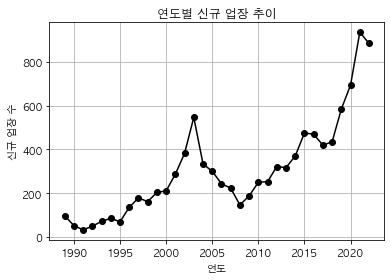

In [61]:
plt.title('연도별 신규 업장 추이')
df_final.groupby(df_final['인허가일자'].dt.year)['인허가일자'].count().plot(c= 'k',marker = 'o')
plt.xlabel("연도")
plt.ylabel("신규 업장 수")
plt.grid(True)
plt.show()

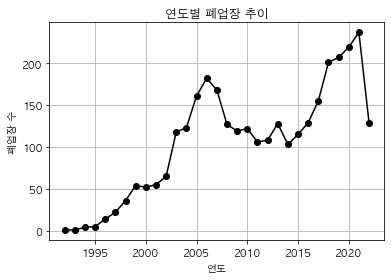

In [60]:
plt.title('연도별 폐업장 추이')
df_final[df_final['상세영업상태명'] == '폐업'].groupby(df_final['폐업일자'].dt.year)['폐업일자'].count().plot(c = 'k', marker = 'o')
plt.xlabel("연도")
plt.ylabel("폐업장 수")
plt.grid(True)
plt.show()

<AxesSubplot:title={'center':'연도별 신규 업장 추이'}, xlabel='인허가일자', ylabel='신규 업장 수'>

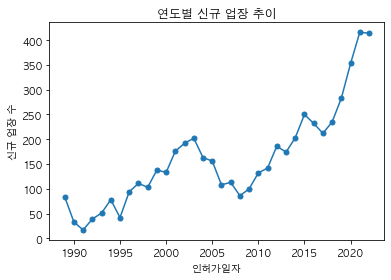

In [6]:
plt.title("연도별 신규 업장 추이")
plt.xlabel("연도")
plt.ylabel("신규 업장 수")
df_Seoul.groupby(df_Seoul['인허가일자'].dt.year)['영업상태명'].count().plot(marker = 'o', ms = 5)

In [21]:
df_Seoul[df_Seoul['상세영업상태명'] == '폐업'].groupby(df_Seoul['폐업일자'].dt.year)['폐업일자'].count().plot(marker = 'o', ms = 5)
plt.title("연도별 폐업장 추이")
plt.ylabel("폐업장 수")
plt.xlabel("연도")



AttributeError: Can only use .dt accessor with datetimelike values

<AxesSubplot:title={'center':'연도별 신규 업장 추이'}, xlabel='인허가일자', ylabel='신규 업장 수'>

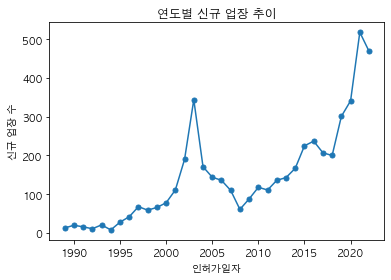

In [21]:
plt.title("연도별 신규 업장 추이")
plt.xlabel("연도")
plt.ylabel("신규 업장 수")
df_GG.groupby(df_GG['인허가일자'].dt.year)['영업상태명'].count().plot(marker = 'o', ms = 5)

<AxesSubplot:title={'center':'연도별 폐업장 추이'}, xlabel='폐업일자', ylabel='폐업장 수'>

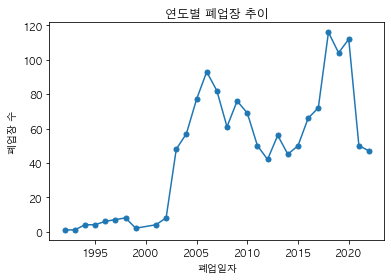

In [30]:
plt.title("연도별 폐업장 추이")
plt.ylabel("폐업장 수")

df_GG[df_GG['영업상태명'] == '폐업'].groupby(df_GG['폐업일자'].dt.year)['폐업일자'].count().plot(marker = 'o', ms = 5)